In [67]:
import pandas as pd

In [127]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

df = df[['v1','v2']]


In [128]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


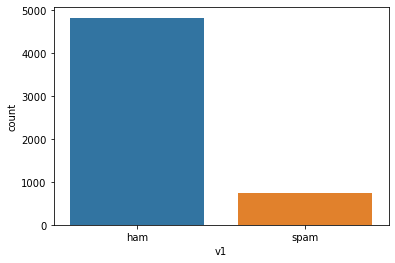

In [101]:
import seaborn as sns

sns.countplot(x='v1', data=df);

In [102]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_df = df[df['v1'] == 'ham']
minority_df = df[df['v1'] == 'spam']

# Determine the size of the minority class
minority_size = len(minority_df)

# Undersample the majority class to the size of the minority class
undersampled_majority_df = resample(majority_df, replace=False, n_samples=minority_size, random_state=42)

# Combine the minority and undersampled majority classes
balanced_df = pd.concat([minority_df, undersampled_majority_df])

# Shuffle the rows of the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [104]:
balanced_df['lenght_msg'] = balanced_df['v2'].apply(lambda x: len(x))

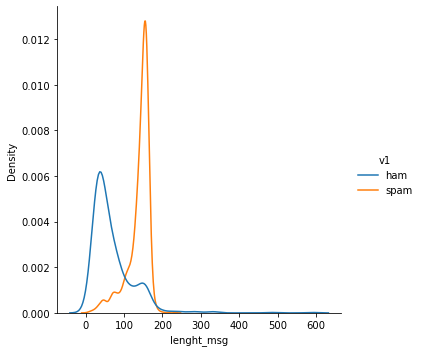

In [105]:
sns.displot(x='lenght_msg', data=balanced_df, hue='v1', kind='kde');

In [107]:
balanced_df.groupby('v1').describe()

lenght_msg                                                         
          count        mean        std   min    25%    50%    75%    max
v1                                                                      
ham       747.0   69.117805  54.961157   3.0   33.0   51.0   86.0  588.0
spam      747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [108]:
import re

def expand_contractions(text):
    # Define a dictionary of contractions and their expansions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    
    # Create a regular expression pattern to match the contractions
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    
    # Replace the contractions with their expansions
    expanded_text = pattern.sub(lambda match: contractions[match.group(0)], text)
    
    return expanded_text


In [109]:
import string

punctuations = string.punctuation

In [110]:
balanced_df['v2'] = balanced_df['v2'].str.lower()

In [111]:
balanced_df['v2'] = balanced_df['v2'].apply(expand_contractions)

In [112]:
# Initialize counts for each punctuation mark
spam_counts = {p: 0 for p in punctuations}
ham_counts = {p: 0 for p in punctuations}

# Loop over each message in the DataFrame
for idx, row in balanced_df.iterrows():
    message = row['v2']
    target = row['v1']
    
    # Count the punctuation marks in the message
    for p in punctuations:
        count = message.count(p)
        
        # Add the count to the appropriate dictionary based on the target
        if target == 'spam':
            spam_counts[p] += count
        else:
            ham_counts[p] += count



In [113]:
ham_punct_df = pd.DataFrame.from_dict(ham_counts, orient='index', columns=['ham_count'])
spam_punct_df = pd.DataFrame.from_dict(spam_counts, orient='index', columns=['spam_count'])

punct_df = ham_punct_df.join(spam_punct_df, how='outer')


In [114]:
punct_df = punct_df.sort_values(by=['ham_count', 'spam_count'], ascending=False)

In [115]:
punct_df

,ham_count,spam_count
.,1372,1560
",",219,405
?,211,174
!,133,542
&,111,178
;,111,2
:,88,179
),73,65
',65,79
-,44,247


In [116]:
import matplotlib.pyplot as plt

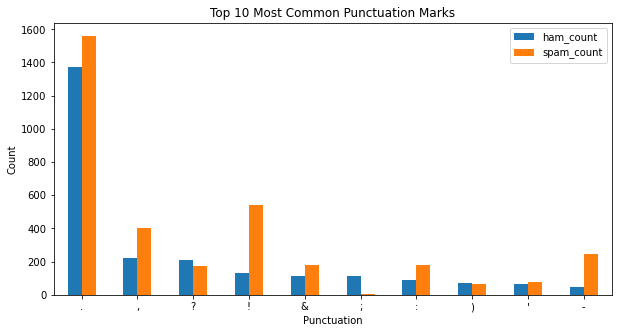

In [117]:
# Plot a bar chart of the top 10 most common punctuation marks
top_punct_df = punct_df.head(10)
ax = top_punct_df.plot(kind='bar', figsize=(10, 5), rot=0)
ax.set_xlabel('Punctuation')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Common Punctuation Marks')
plt.show()

In [121]:
spam_msgs = balanced_df[balanced_df['v1']=='spam']
spam_msgs[spam_msgs['v2'].str.contains('!')].sample(5)

,v1,v2,lenght_msg
1088,spam,you are awarded a sipix digital camera! call 0...,153
2495,spam,winner! as a valued network customer you hvae ...,150
4034,spam,you are chosen to receive a å£350 award! pls c...,159
1429,spam,for sale - arsenal dartboard. good condition b...,71
4434,spam,do not b floppy... b snappy & happy! only gay ...,137


In [124]:
translator = str.maketrans('', '', string.punctuation)
balanced_df['v2'] = balanced_df['v2'].apply(lambda x: x.translate(translator))

balanced_df

,v1,v2,lenght_msg,tokens
270,ham,come to mu we are sorting out our narcotics si...,53,"[come, to, mu, ,, we, are, sorting, out, our, ..."
4923,ham,we can go 4 e normal pilates after our intro,49,"[we, can, go, 4, e, normal, pilates, after, ou..."
4598,ham,have you laid your airtel line to rest,39,"[have, you, laid, your, airtel, line, to, rest..."
5093,ham,gokila is talking with you aha,32,"[gokila, is, talking, with, you, aha, :, )]"
2775,ham,we confirm eating at esplanade,31,"[we, confirm, eating, at, esplanade, ?]"
...,...,...,...,...
589,ham,I am in a meeting call me later at,34,"[I, am, in, a, meeting, ,, call, me, later, at]"
2624,ham,s daal r above ltgt,27,"[s, da, .., al, r, above, &, lt, ;, #, &, gt, ;]"
2989,ham,love is not a decision it is a feeling if we c...,126,"[love, is, not, a, decision, ,, it, is, a, fee..."
1825,ham,wat makes some people dearer is not just de ha...,119,"[wat, makes, some, people, dearer, is, not, ju..."


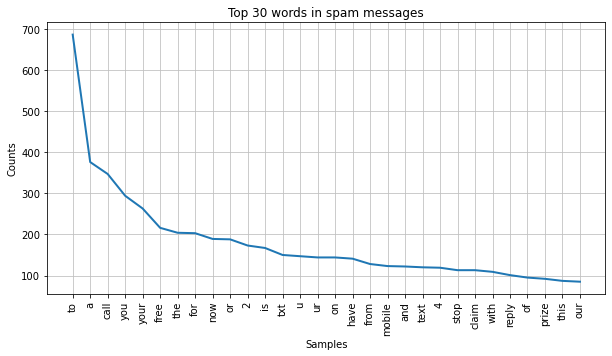

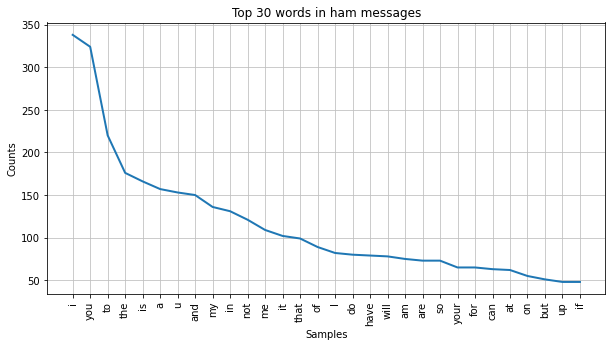

In [125]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

balanced_df['tokens'] = balanced_df['v2'].apply(word_tokenize)

fdist_spam = FreqDist([word for tokens in balanced_df[balanced_df['v1'] == 'spam']['tokens'] for word in tokens])
fdist_ham = FreqDist([word for tokens in balanced_df[balanced_df['v1'] == 'ham']['tokens'] for word in tokens])

plt.figure(figsize=(10, 5))
fdist_spam.plot(30, cumulative=False, title='Top 30 words in spam messages')
plt.show()

plt.figure(figsize=(10, 5))
fdist_ham.plot(30, cumulative=False, title='Top 30 words in ham messages')
plt.show()